<a href="https://colab.research.google.com/github/sourds42/basics/blob/main/MinorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists


In [ ]:
from  bing_image_downloader import downloader
downloader.download("Yellow Mango Fruit jpg",limit=25,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/Yellow Mango Fruit jpg


[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://i.ebayimg.com/images/g/k1EAAOSwRNde2NPn/s-l640.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://assets.bringmeister.de/media/p/8740030021/0/c1e6013621311a29e88763c2595cb64b.jpg?imwidth=495
[!] Issue getting: https://assets.bringmeister.de/media/p/8740030021/0/c1e6013621311a29e88763c2595cb64b.jpg?imwidth=495
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://thumbs.dreamstime.com/b/yellow-sweet-mango-fruit-asia-fruit-natural-background-54511133.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://thumbs.dreamstime.com/b/yellow-plum-mango-fruit-basket-93149288.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://smoothi.de/wp-content/uploads/2016/04/True-Fruits-Yellow-Mango-Maracujy-8-x-250ml-0.jpg
[!] Issue getting: https://smoothi.de/wp-content/uploads/2016/04/Tr

In [ ]:
from  bing_image_downloader import downloader
downloader.download("Red Apple Fruit jpg",limit=25,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/Red Apple Fruit jpg


[!!]Indexing page: 1

[%] Indexed 25 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/b0/bb/ec/b0bbec5292094bbbaf1db1fafea2aa1a.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://pixnio.com/free-images/flora-plants/fruits/apple-pictures/beautiful-red-apple.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://bharatiya.co/wp-content/uploads/2020/05/Red-Apples.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://upload.wikimedia.org/wikipedia/commons/0/06/Red_apple_fruits.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://iranfreshfruit.net/wp-content/uploads/2020/01/red-apple-fruit.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://c2.peakpx.com/wallpaper/506/19/628/fruit-apple-tree-harvest-wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://pixnio.com/free-images/2018/07/01/2018-07-01-16-50-16.jpg
[%] Fi

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data= []
DATADIR='/content/images'
#os.rename(os.path.join(DATADIR,"Yellow Mango Fruit jpg"),os.path.join(DATADIR,"Mango"))
#os.rename(os.path.join(DATADIR,"Red Apple Fruit jpg"),os.path.join(DATADIR,"Apple"))
CATEGORIES=['Mango','Apple']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized = resize(img_array,(100,100,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3, random_state=109)
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
import pickle 
pickle.dump(clf,open('img_model.p','wb'))
model=pickle.load(open('img_model.p','rb'))

Enter your URL: https://5.imimg.com/data5/LM/DU/MY-22954806/apple-fruit-500x500.jpg
(500, 500, 3)
Predicted output:Apple


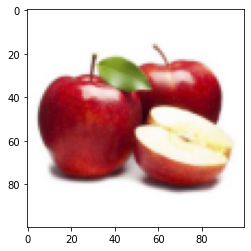

In [ ]:
flat_data=[]
url=input('Enter your URL: ')
img=imread(url)
img_resized=resize(img,(100,100,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'Predicted output:{y_out}')